In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings

plt.style.use('default')
plt.rcParams['figure.dpi'] = 70
filterwarnings('ignore')

## Exercises

1. Train a perceptron on the 3D point set, until the error doesn't get better by 1e-5
   compared to the previous epochs. Use the `learning rate = 0.1`.

   Calculate the accuracy on the training data and testing data, then print the weights, the bias
   and the number of epochs trained until convergence.

   Plot the decision function of the classifier using the `plot3d_data_and_decision_function()`
   function.

2. Train a perceptron network that classifies the MNIST dataset. The data must ve normalized by
   subtracting the mean and dividing by the standard deviation.

   Train and test the following network configurations:

   a) `tanh` activation function, `hidden_layer_sizes=(1)`, `learning_rate_init=0.01`,
      `momentum=0`, `max_iter=200 (default)`

   b) `tanh` activation function, `hidden_layer_sizes=(10)`, `learning_rate_init=0.01`,
      `momentum=0`, `max_iter=200 (default)`

   c) `tanh` activation function, `hidden_layer_sizes=(10)`, `learning_rate_init=0.00001`,
      `momentum=0`, `max_iter=200 (default)`

   d) `tanh` activation function, `hidden_layer_sizes=(10)`, `learning_rate_init=10`,
      `momentum=0`, `max_iter=200 (default)`

   e) `tanh` activation function, `hidden_layer_sizes=(10)`, `learning_rate_init=0.01`,
      `momentum=0`, `max_iter=20`

   f) `tanh` activation function, `hidden_layer_sizes=(10, 10)`, `learning_rate_init=0.01`,
      `momentum=0`, `max_iter=2000`

   g) `relu` activation function, `hidden_layer_sizes=(10, 10)`, `learning_rate_init=0.01`,
      `momentum=0`, `max_iter=2000`

   h) `relu` activation function, `hidden_layer_sizes=(100, 100)`, `learning_rate_init=0.01`,
      `momentum=0`, `max_iter=2000`

   i) `relu` activation function, `hidden_layer_sizes=(100, 100)`, `learning_rate_init=0.01`,
      `momentum=0.9`, `max_iter=2000`

   j) `relu` activation function, `hidden_layer_sizes=(100, 100)`, `learning_rate_init=0.01`,
      `momentum=0.9`, `max_iter=2000`, `alpha=0.005`

In [2]:
def plot3d_data(X, y):
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b')
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r')
    plt.show()

In [3]:
def plot3d_data_and_decision_function(X, y, W, b): 
    ax = plt.axes(projection='3d')

    # create x, y
    xx, yy = np.meshgrid(range(10), range(10))

    # calculate corresponding z
    # [x, y, z] * [coef1, coef2, coef3] + b = 0
    zz = (-W[0] * xx - W[1] * yy - b) / W[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5) 
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b')
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r')
    plt.show()

### Loading the training data

In [4]:
X = np.loadtxt('./data/3d-points/x_train.txt')
y = np.loadtxt('./data/3d-points/y_train.txt', 'int')

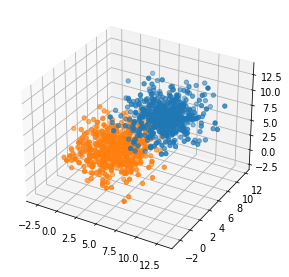

In [5]:
plot3d_data(X, y)

### Loading the testing data

In [6]:
X_test = np.loadtxt('./data/3d-points/x_test.txt')
y_test = np.loadtxt('./data/3d-points/y_test.txt', 'int')

### Exercise 1.

#### Defining and training a Perceptron

In [7]:
perceptron_model = Perceptron(tol=1e-5, early_stopping=True, eta0=0.1)
perceptron_model.fit(X, y)

Perceptron(early_stopping=True, eta0=0.1, tol=1e-05)

#### Predicting training and testing data

In [8]:
train_pred = perceptron_model.predict(X)
test_pred = perceptron_model.predict(X_test)

#### Calculating the accuracy score

In [9]:
train_acc = accuracy_score(y, train_pred)
test_acc = accuracy_score(y_test, test_pred)

#### Printing information and plotting

Train accuracy: 0.891
Test accuracy: 0.92
Learned weights: [[-1.18841049 -1.33054551 -1.67664006]]
Learned bias: [16.9]
Number of epochs until convergence: 6


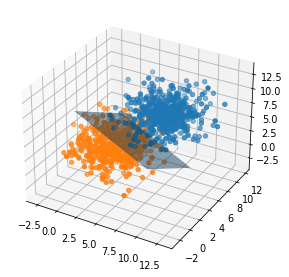

In [10]:
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Learned weights:", perceptron_model.coef_)
print("Learned bias:", perceptron_model.intercept_)
print("Number of epochs until convergence:", perceptron_model.n_iter_)
plot3d_data_and_decision_function(X, y, perceptron_model.coef_[0], perceptron_model.intercept_[0])

### Exercise 2.

#### Loading data

In [11]:
X = np.loadtxt('./data/MNIST/train_images.txt')
y = np.loadtxt('./data/MNIST/train_labels.txt', 'int')
X_test = np.loadtxt('./data/MNIST/test_images.txt')
y_test = np.loadtxt('./data/MNIST/test_labels.txt', 'int')

#### Scaling data

In [12]:
scaler = StandardScaler()
scaler.fit(X, y)

X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

#### Ex 2. a)

In [13]:
mlp_classifier_model_1 = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(1,),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=200
)

mlp_classifier_model_1.fit(X_scaled, y)

train_pred_1 = mlp_classifier_model_1.predict(X_scaled)
test_pred_1 = mlp_classifier_model_1.predict(X_test_scaled)

train_acc_1 = accuracy_score(y, train_pred_1)
test_acc_1 = accuracy_score(y_test, test_pred_1)

print(train_acc_1)
print(test_acc_1)

0.243
0.2


#### Ex 2. b)

In [14]:
mlp_classifier_model_2 = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=200
)

mlp_classifier_model_2.fit(X_scaled, y)

train_pred_2 = mlp_classifier_model_2.predict(X_scaled)
test_pred_2 = mlp_classifier_model_2.predict(X_test_scaled)

train_acc_2 = accuracy_score(y, train_pred_2)
test_acc_2 = accuracy_score(y_test, test_pred_2)

print(train_acc_2)
print(test_acc_2)

1.0
0.832


#### Ex 2. c)

In [15]:
mlp_classifier_model_3 = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=0.00001,
    momentum=0,
    max_iter=200
)

mlp_classifier_model_3.fit(X_scaled, y)

train_pred_3 = mlp_classifier_model_3.predict(X_scaled)
test_pred_3 = mlp_classifier_model_3.predict(X_test_scaled)

train_acc_3 = accuracy_score(y, train_pred_3)
test_acc_3 = accuracy_score(y_test, test_pred_3)

print(train_acc_3)
print(test_acc_3)

0.275
0.25


#### Ex 2. d)

In [16]:
mlp_classifier_model_4 = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=10,
    momentum=0,
    max_iter=200
)

mlp_classifier_model_4.fit(X_scaled, y)

train_pred_4 = mlp_classifier_model_4.predict(X_scaled)
test_pred_4 = mlp_classifier_model_4.predict(X_test_scaled)

train_acc_4 = accuracy_score(y, train_pred_4)
test_acc_4 = accuracy_score(y_test, test_pred_4)

print(train_acc_4)
print(test_acc_4)

0.43
0.408


#### Ex 2. e)

In [17]:
mlp_classifier_model_5 = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10,),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=20
)

mlp_classifier_model_5.fit(X_scaled, y)

train_pred_5 = mlp_classifier_model_5.predict(X_scaled)
test_pred_5 = mlp_classifier_model_5.predict(X_test_scaled)

train_acc_5 = accuracy_score(y, train_pred_5)
test_acc_5 = accuracy_score(y_test, test_pred_5)

print(train_acc_5)
print(test_acc_5)

0.98
0.84


#### Ex 2. f)

In [18]:
mlp_classifier_model_6 = MLPClassifier(
    activation='tanh',
    hidden_layer_sizes=(10, 10),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=2000
)

mlp_classifier_model_6.fit(X_scaled, y)

train_pred_6 = mlp_classifier_model_6.predict(X_scaled)
test_pred_6 = mlp_classifier_model_6.predict(X_test_scaled)

train_acc_6 = accuracy_score(y, train_pred_6)
test_acc_6 = accuracy_score(y_test, test_pred_6)

print(train_acc_6)
print(test_acc_6)

0.949
0.782


#### Ex 2. g)

In [19]:
mlp_classifier_model_7 = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(10, 10),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=2000
)

mlp_classifier_model_7.fit(X_scaled, y)

train_pred_7 = mlp_classifier_model_7.predict(X_scaled)
test_pred_7 = mlp_classifier_model_7.predict(X_test_scaled)

train_acc_7 = accuracy_score(y, train_pred_7)
test_acc_7 = accuracy_score(y_test, test_pred_7)

print(train_acc_7)
print(test_acc_7)

1.0
0.842


#### Ex 2. h)

In [20]:
mlp_classifier_model_8 = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100),
    learning_rate_init=0.01,
    momentum=0,
    max_iter=2000
)

mlp_classifier_model_8.fit(X_scaled, y)

train_pred_8 = mlp_classifier_model_8.predict(X_scaled)
test_pred_8 = mlp_classifier_model_8.predict(X_test_scaled)

train_acc_8 = accuracy_score(y, train_pred_8)
test_acc_8 = accuracy_score(y_test, test_pred_8)

print(train_acc_8)
print(test_acc_8)

1.0
0.904


#### Ex 2. i)

In [21]:
mlp_classifier_model_9 = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100),
    learning_rate_init=0.01,
    momentum=0.9,
    max_iter=2000
)

mlp_classifier_model_9.fit(X_scaled, y)

train_pred_9 = mlp_classifier_model_9.predict(X_scaled)
test_pred_9 = mlp_classifier_model_9.predict(X_test_scaled)

train_acc_9 = accuracy_score(y, train_pred_9)
test_acc_9 = accuracy_score(y_test, test_pred_9)

print(train_acc_9)
print(test_acc_9)

1.0
0.888


#### Ex 2. j)

In [22]:
mlp_classifier_model_10 = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100),
    learning_rate_init=0.01,
    momentum=0.9,
    max_iter=2000,
    alpha=0.005
)

mlp_classifier_model_10.fit(X_scaled, y)

train_pred_10 = mlp_classifier_model_10.predict(X_scaled)
test_pred_10 = mlp_classifier_model_10.predict(X_test_scaled)

train_acc_10 = accuracy_score(y, train_pred_10)
test_acc_10 = accuracy_score(y_test, test_pred_10)

print(train_acc_10)
print(test_acc_10)

1.0
0.894


### Printing best model

In [23]:
train_accuracies = np.array([
    train_acc_1,
    train_acc_2,
    train_acc_3,
    train_acc_4,
    train_acc_5,
    train_acc_6,
    train_acc_7,
    train_acc_8,
    train_acc_9,
    train_acc_10
])

test_accuracies = np.array([
    test_acc_1,
    test_acc_2,
    test_acc_3,
    test_acc_4,
    test_acc_5,
    test_acc_6,
    test_acc_7,
    test_acc_8,
    test_acc_9,
    test_acc_10
])

print('Best train accuracy:', train_accuracies.max())
print('Best model according to train_accuracy:', train_accuracies.argmax() + 1)
print('Test accuracy:', test_accuracies[train_accuracies.argmax()])
print('Accuracy difference:', train_accuracies[train_accuracies.argmax()] - test_accuracies[train_accuracies.argmax()])
print()
print('Best test accuracy:', test_accuracies.max())
print('Best model according to test_accuracy:', test_accuracies.argmax() + 1)
print('Train accuracy:', train_accuracies[test_accuracies.argmax()])
print('Accuracy difference:', train_accuracies[test_accuracies.argmax()] - test_accuracies[test_accuracies.argmax()])

Best train accuracy: 1.0
Best model according to train_accuracy: 2
Test accuracy: 0.832
Accuracy difference: 0.16800000000000004

Best test accuracy: 0.904
Best model according to test_accuracy: 8
Train accuracy: 1.0
Accuracy difference: 0.09599999999999997
